[https://www.kaggle.com/competitions/digit-recognizer/data?select=sample_submission.csv]

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
sns.set(style='white', context='notebook', palette="hls")
# sns.color_palette("hls", 8)

2023-12-23 13:31:33.082071: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-23 13:31:33.082133: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-23 13:31:33.210309: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-23 13:31:33.473682: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-23 13:31:34.655649: W tensorflow/compiler/tf2

In [2]:
train = pd.read_csv("train.csv")
target = "label"
features = train.columns[train.columns != target]

In [3]:
x_train = train[features]
y_train = train[target]
del train 

y_train.value_counts().sort_index()

label
0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: count, dtype: int64

/tmp/ipykernel_2957/563962283.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette="hls")


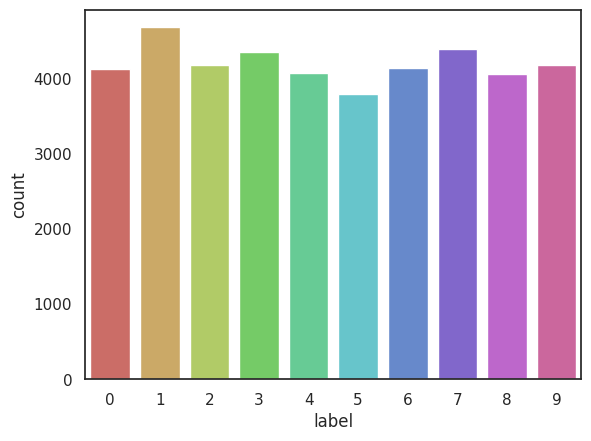

In [4]:
sns.countplot(x=y_train, palette="hls")
plt.show()

In [5]:
x_train.isna().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [6]:
y_train.isna().any()

False

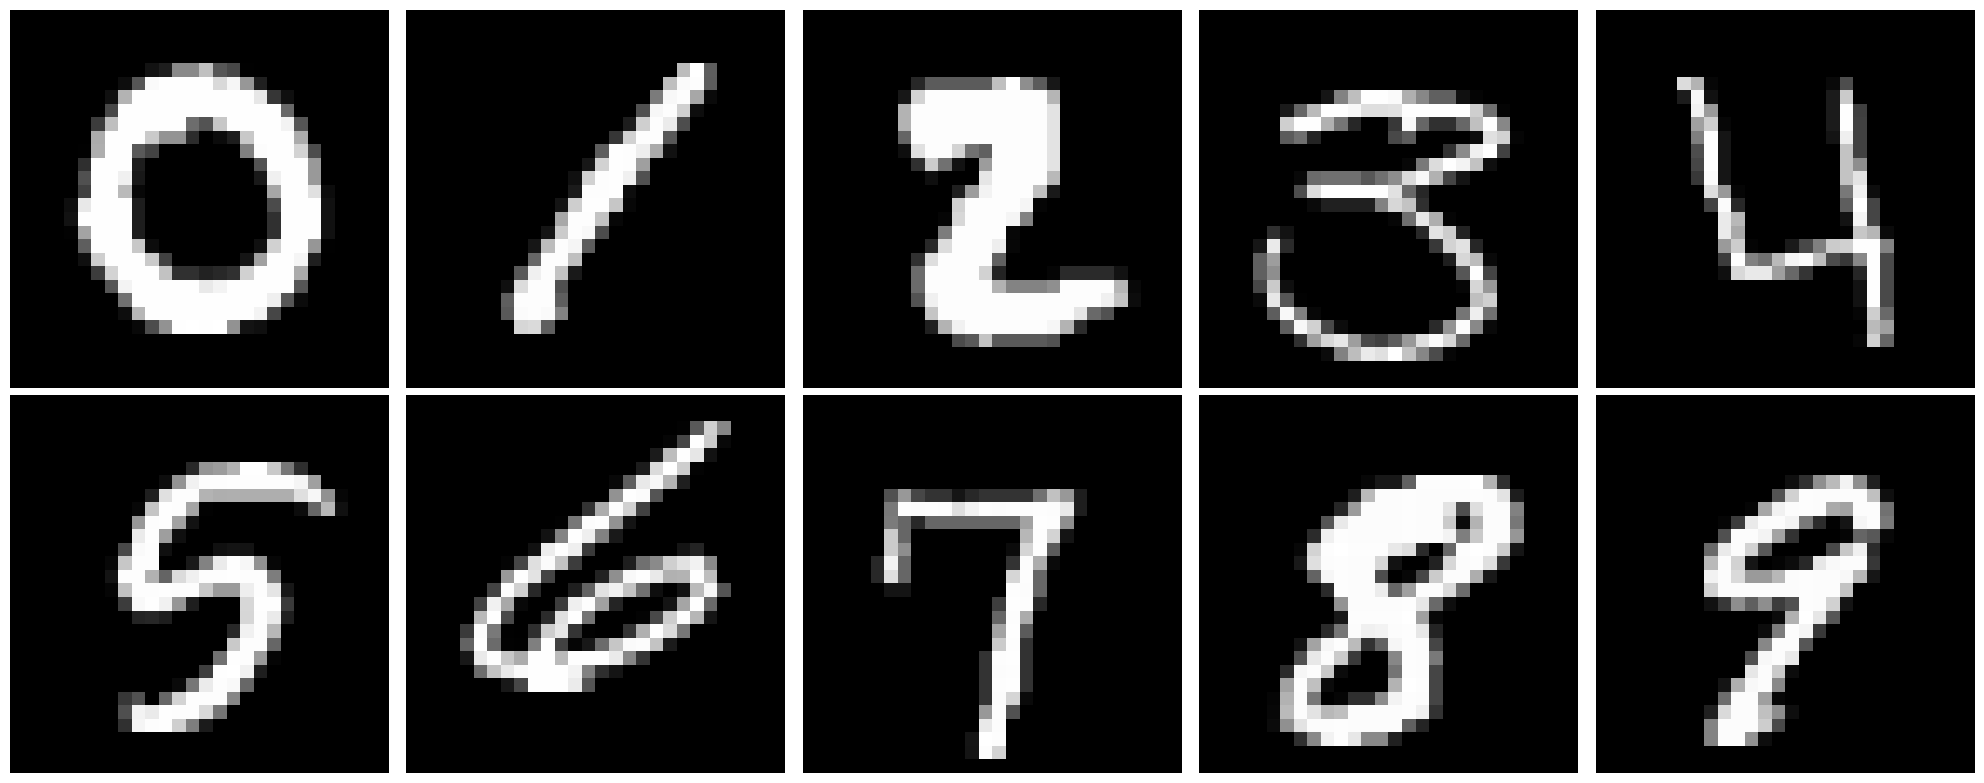

In [7]:
first_indices = y_train.groupby(y_train).idxmin()

fig, ax = plt.subplots(2, 5, figsize=(20,8))
ax = ax.flatten()

for i, index in enumerate(first_indices):
    number = x_train.iloc[index].values.reshape(28,28)
    ax[i].imshow(number, cmap="gray")
    ax[i].axis("off")
    
plt.tight_layout()
plt.show()
    

In [8]:
mas = MaxAbsScaler()
x_train = mas.fit_transform(x_train)

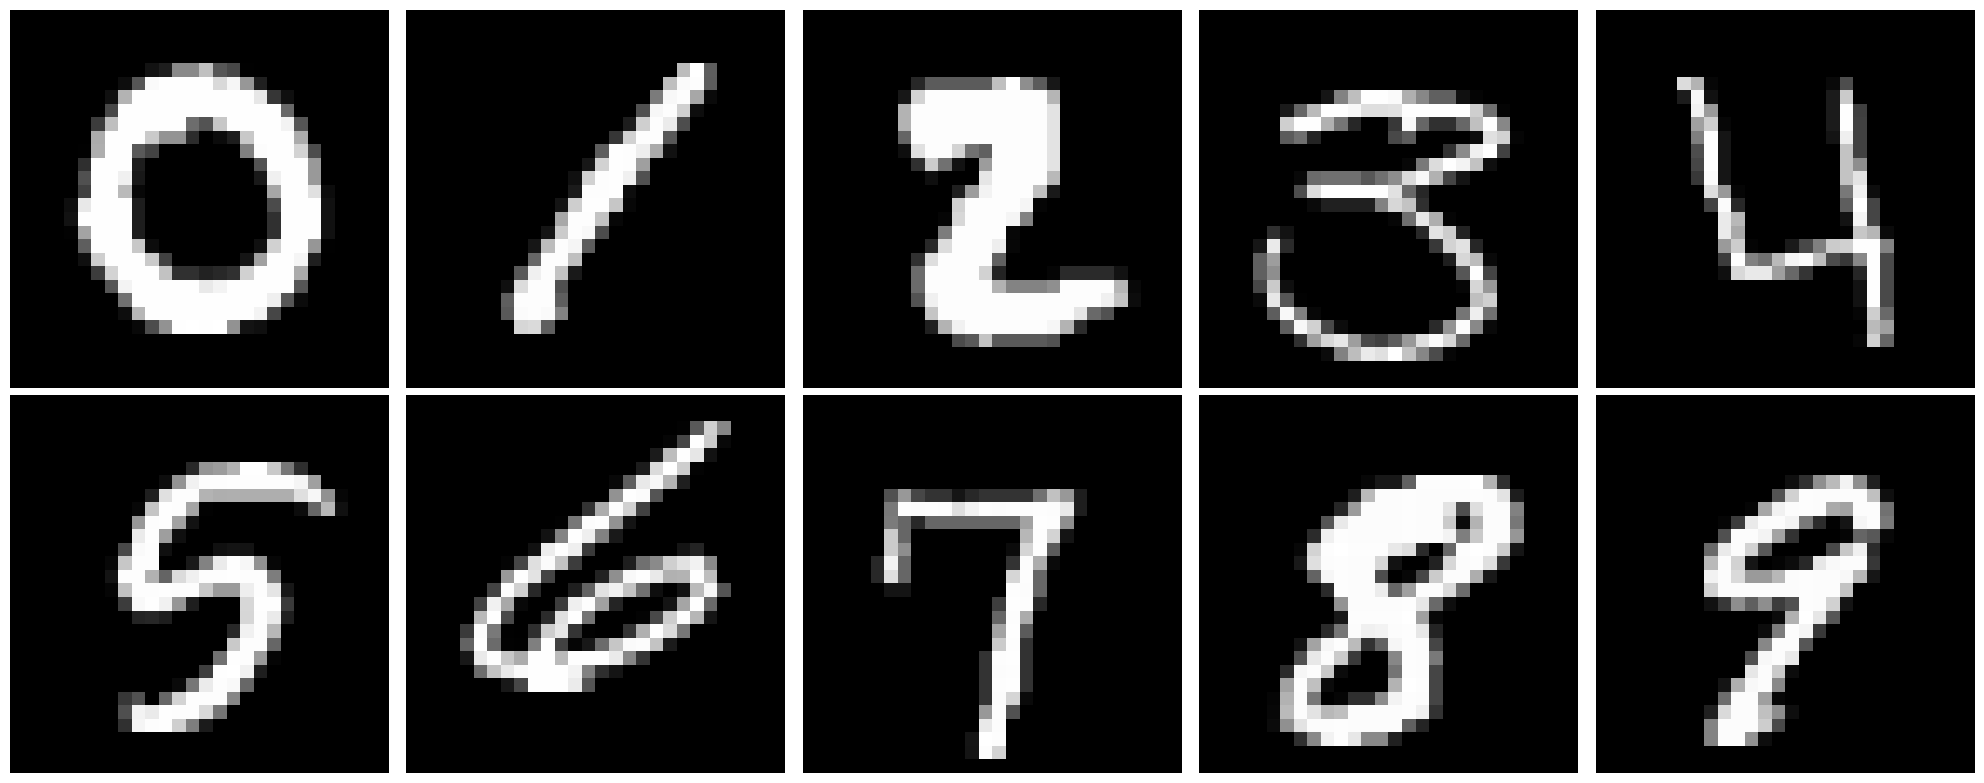

In [9]:
first_indices = y_train.groupby(y_train).idxmin()

fig, ax = plt.subplots(2, 5, figsize=(20,8))
ax = ax.flatten()

for i, index in enumerate(first_indices):
    number = x_train[index].reshape(28,28)
    ax[i].imshow(number, cmap="gray")
    ax[i].axis("off")
    
plt.tight_layout()
plt.show()

In [10]:
y_train = to_categorical(y_train, num_classes=10)

In [11]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1)

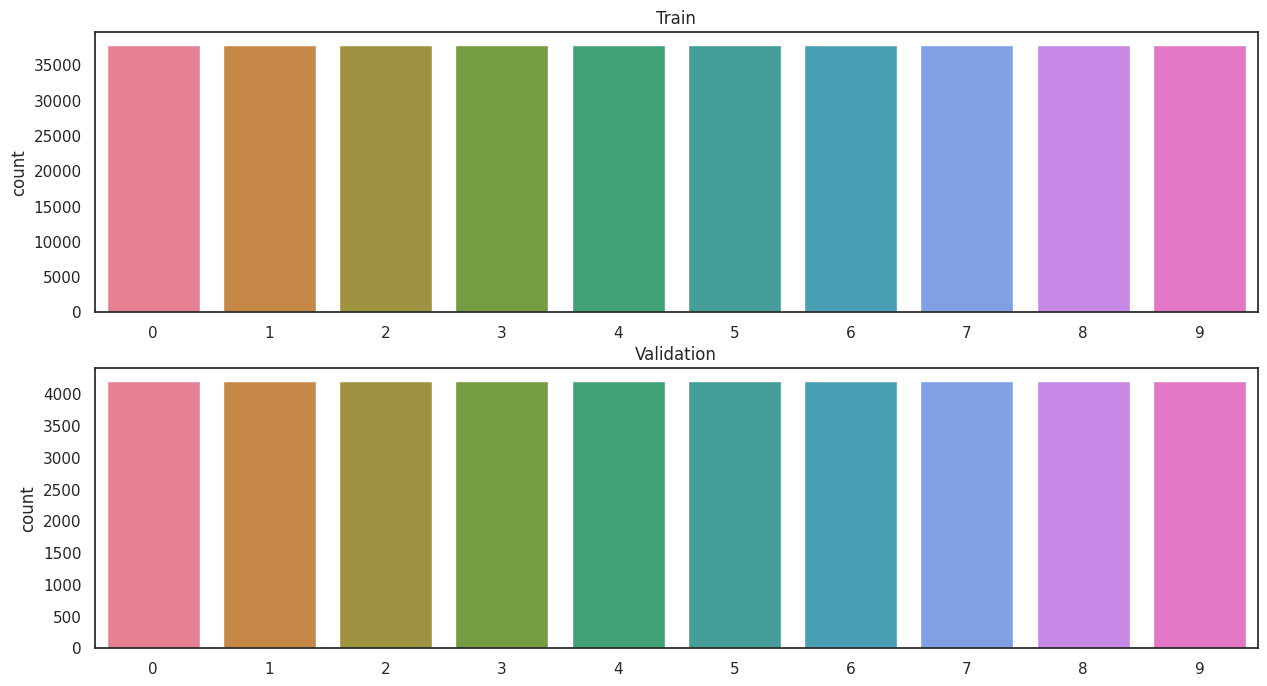

In [12]:
fig, ax = plt.subplots(2,1, figsize=(15,8))
ax = ax.flatten()
sns.countplot(y_train, ax=ax[0])
ax[0].set_title("Train")
sns.countplot(y_val, ax=ax[1])
ax[1].set_title("Validation")
plt.show()

In [13]:
print(x_train.shape)

(37800, 784)


In [14]:
x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_val = x_val.reshape((len(x_val), 28, 28, 1))

model = Sequential([
    # Convolutional and pooling layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    # Flatten layer to transition from convolutional to dense layers
    layers.Flatten(),
    
    # Dense layers
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Assuming 10 classes for classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use 'categorical_crossentropy' for one-hot encoded labels
              metrics=['accuracy'])

In [15]:
logs = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/30
1182/1182 [==============================] - 9s 7ms/step - loss: 0.1854 - accuracy: 0.9442 - val_loss: 0.0704 - val_accuracy: 0.9771
Epoch 2/30
1182/1182 [==============================] - 8s 6ms/step - loss: 0.0549 - accuracy: 0.9833 - val_loss: 0.0529 - val_accuracy: 0.9798
Epoch 3/30
1182/1182 [==============================] - 8s 6ms/step - loss: 0.0396 - accuracy: 0.9873 - val_loss: 0.0490 - val_accuracy: 0.9860
Epoch 4/30
1182/1182 [==============================] - 7s 6ms/step - loss: 0.0307 - accuracy: 0.9897 - val_loss: 0.0459 - val_accuracy: 0.9883
Epoch 5/30
1182/1182 [==============================] - 8s 7ms/step - loss: 0.0221 - accuracy: 0.9932 - val_loss: 0.0454 - val_accuracy: 0.9874
Epoch 6/30
1182/1182 [==============================] - 8s 7ms/step - loss: 0.0210 - accuracy: 0.9929 - val_loss: 0.0378 - val_accuracy: 0.9898
Epoch 7/30
1182/1182 [==============================] - 8s 6ms/step - loss: 0.0158 - accuracy: 0.9950 - val_loss: 0.0551 - val_accuracy:

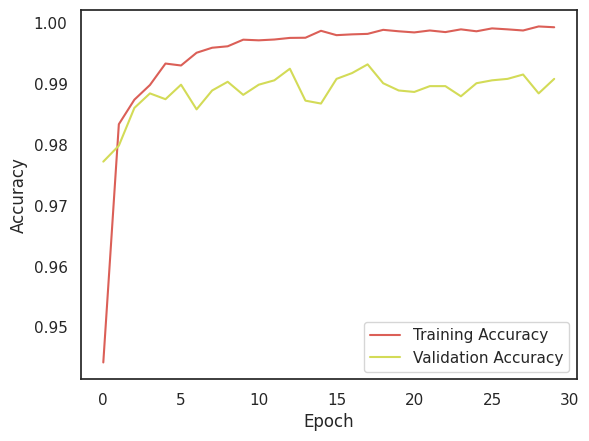

In [16]:
plt.plot(logs.history['accuracy'], label='Training Accuracy')
plt.plot(logs.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
test = pd.read_csv("test.csv")